Face detection using HOG - Method


Picture 

In [ ]:
import cv2
import dlib
from imutils import face_utils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
def detectDlib(imgpath):
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_detect = dlib.get_frontal_face_detector()
    rects = face_detect(gray, 1)
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)
    # plt.imshow(frame)
    # plt.show()
    cv2_imshow(frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


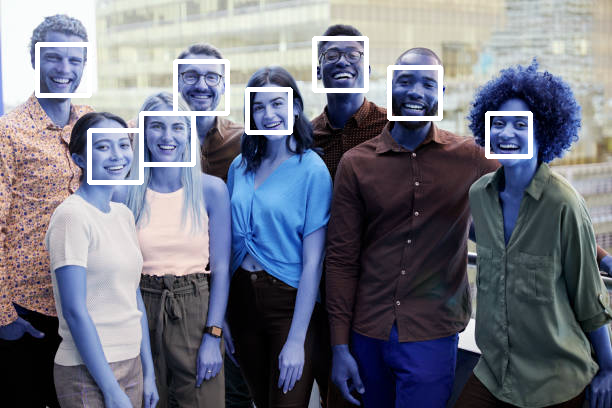

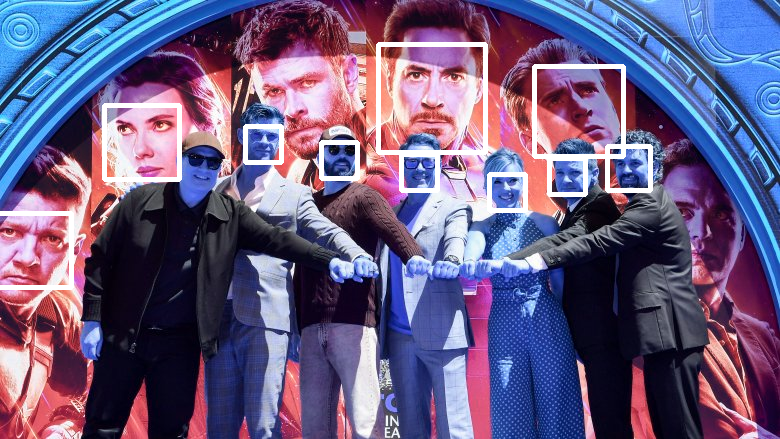

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
detectDlib('/content/gdrive/MyDrive/Colab Notebooks/groupPhoto.jpg')
detectDlib('/content/gdrive/MyDrive/Colab Notebooks/avengers.jpg')

Video Mode

In [ ]:
import cv2
import dlib
from imutils import face_utils
from google.colab.patches import cv2_imshow
def detectVidHOG(vidpath):
    video_capture = cv2.VideoCapture(vidpath)
    flag = 0

    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    out = cv2.VideoWriter('outputHOG.avi',fourcc,20.0,(int(video_capture.get(3)),int(video_capture.get(4))))
    while True:

        ret, frame = video_capture.read()
        #frame = cv2.resize(frame,(256,256))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        face_detect = dlib.get_frontal_face_detector()

        rects = face_detect(gray, 1)
        
        for (i, rect) in enumerate(rects):

            (x, y, w, h) = face_utils.rect_to_bb(rect)

            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
        #out.write(frame)
        cv2_imshow('Video', frame)
        # plt.imshow(frame)
        # plt.show()

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

In [ ]:
# detectVidHOG('/content/gdrive/MyDrive/Colab Notebooks/videoplayback.mp4')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Real Time

In [ ]:
import cv2
import dlib
from imutils import face_utils

video_capture = cv2.VideoCapture(0)
flag = 0

while True:

    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray, 1)

    for (i, rect) in enumerate(rects):

        (x, y, w, h) = face_utils.rect_to_bb(rect)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


error: ignored

MMOD Method

In [ ]:
import cv2
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt
def detectDlibDNN(imgpath):
    
    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    dnnFaceDetector = dlib.cnn_face_detection_model_v1("/content/gdrive/MyDrive/Colab Notebooks/mmod_human_face_detector.dat")
    rects = dnnFaceDetector(gray, 1)
    for (i, rect) in enumerate(rects):
        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    plt.imshow(frame)
    plt.show()

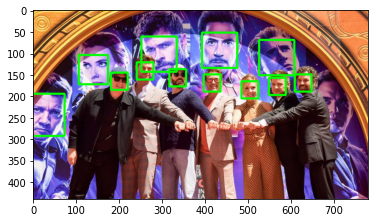

In [ ]:
detectDlibDNN("/content/gdrive/MyDrive/Colab Notebooks/avengers.jpg")

Dlib Face Recognition

In [ ]:
!pip install dlib

In [ ]:
!pip install face_recognition Scikit-learn dlib docopt

     |████████████████████████████████| 100.2MB 47kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=746bc96522fa54a578fc6b5b5164ccb619a17ae3a0e4555f0d1156c5c82b165e
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
"""
Usage:
face_recognize.py -d <train_dir> -i <test_image>

Options:
-h, --help					 Show this help
-d, --train_dir =<train_dir> Directory with
								images for training
-i, --test_image =<test_image> Test image
"""

# importing libraries
import face_recognition
import docopt
from sklearn import svm
import os

def face_recognize(dir, test):
	# Training the SVC classifier
	# The training data would be all the
	# face encodings from all the known
	# images and the labels are their names
	encodings = []
	names = []

	# Training directory
	if dir[-1]!='/':
		dir += '/'
	train_dir = os.listdir(dir)

	# Loop through each person in the training directory
	for person in train_dir:
		pix = os.listdir(dir + person)

		# Loop through each training image for the current person
		for person_img in pix:
			# Get the face encodings for the face in each image file
			face = face_recognition.load_image_file(
				dir + person + "/" + person_img)
			face_bounding_boxes = face_recognition.face_locations(face)

			# If training image contains exactly one face
			if len(face_bounding_boxes) == 1:
				face_enc = face_recognition.face_encodings(face)[0]
				# Add face encoding for current image
				# with corresponding label (name) to the training data
				encodings.append(face_enc)
				names.append(person)
			else:
				print(person + "/" + person_img + " can't be used for training")

	# Create and train the SVC classifier
	clf = svm.SVC(gamma ='scale')
	clf.fit(encodings, names)

	# Load the test image with unknown faces into a numpy array
	test_image = face_recognition.load_image_file(test)

	# Find all the faces in the test image using the default HOG-based model
	face_locations = face_recognition.face_locations(test_image)
	no = len(face_locations)
	print("Number of faces detected: ", no)

	# Predict all the faces in the test image using the trained classifier
	print("Found:")
	for i in range(no):
		test_image_enc = face_recognition.face_encodings(test_image)[i]
		name = clf.predict([test_image_enc])
		print(*name)

def main():
	args = docopt.docopt(__doc__)
	train_dir = args["--train_dir"]
	test_image = args["--test_image"]
	face_recognize(train_dir, test_image)

if __name__=="__main__":
	main()

